# Lab 1 - Exploring Table Data

### Eric Smith and Jake Carlson

## Introduction
The Global Terrorism Database exists as a repository of all criminal activity deemed 'terrorism' between 1970 and 2016. The data set is currently maintained by the National Consortium for the Study of Terrorism and Responses to Terrorism (START) at the University of Maryland, but several other groups have been responsible for collecting the data in the database since it began in 1970. The raw data set has ~170,000 events in it. For this lab we will specifically be exploring events which happened in the United States, totaling 2,758 events.

## Business Understanding

### Motivations
An active investigation into an act of terror is a hectic time for local and federal investigators. It would be useful if there was a tool that investigators could feed current events into to help narrow the investigation. Specifically, based off of the attack type, location, time, etc., we want to be able to predict what group or type of individual is responsible for carrying out the attack. If an attack has been conducted and the perpetrator is still at large, anything that can be done to reduce the time to apprehend the criminal will increase the security of the targeted community and increase confidence in local and federal law enforcement. A second goal we want to achieve with this data set is determining what areas are likely to be targeted again in the future based off of past events. This information would be useful in planning police presence and urban development.

## Data Understanding

### Data Attributes
The following is a list of attributes in the data, their data types, and a brief description of the attribute.

#### General Information
- **eventid** (ordinal): A unique integer identifying the event, the first eight digits are the date recorded (yyyymmdd) and the last four digits are the sequential case number assigned for that given day
- **year** (ordinal): The year the event occured in
- **month** (ordinal): The month the event occured in
- **day** (ordinal): The day the event occured in
- **extended** (nominal/binary): 1 if the incident was longer than 24 hours, 0 otherwise
    - **resolution** (ordinal): The date an extended incident was resolved if *extended* is 1


- **summary** (text): A brief summary of the event
- **inclusion criteria** (nominal/binary): There are three inclusion criteria where a 1 indicates the event meets that criteria
    - **crit1**: Political, economic, religious, or social goal
    - **crit2**: Intention to coerce, intimidate, or publicize
    - **crit3**: Outside international humanitarian law


- **doubtterr** (nominal/binary): A 1 indicates there is a strong possibility, but not certainty, that the event was an act of terrorism
    - **alternative, alternative_txt** (nominal): Most likely categorization of the incident of the incident other then terrorism if *doubtterr* is 1


- **multiple** (nominal/binary): A 1 indicates the event was connected to one or more other events
- **related** (text): When an event is part of a coordinated attack, the eventid's of the related events are listed here

#### Location
- **country, country_txt** (nominal): Identifies the country in which the attack occured
- **region, region_txt** (nominal): Identifies the region in which the attack occured
- **provstate** (text): The name of the subnational administrative region in which the event occured
- **city** (text): Name of the city in which the event occured
- **vicinity** (nominal/binary): A 1 indicates the event occured in the immediate vicinity of *city*, 0 indicates the even occured in *city*
- **latitude** (ratio): The latitude of the *city* in which the event occured
- **longitude** (ratio): The longitude of the *city* in which the event occured

#### Attack Type
The general method of attack. Although many events only have one attack type, there are instances where multiple attack types were used. This is coded in three attributes:
- **attacktype1, attacktype1_txt** (ordinal): Most severe attack type
- **attacktype2, attacktype2_txt** (ordinal): Second most severe attack type
- **attacktype3, attacktype3_txt** (ordinal): Third most severe attack type


- The attack types follow the following hierarchy:
    1. Assassination
    2. Armed Assault
    3. Bombing/Explosion
    4. Hijacking
    5. Barricade Incident
    6. Kidnapping
    7. Facility/Infrastructure Attack 
    8. Unarmes Assault
    9. Unknown


- **success** (nominal/binary): Indicates whether or the attack was successful (1) or unsuccessful (0)
- **suicide** (nominal/binary): A 1 indicates there was evidence the attacker did not make an effort to escape with their life

#### Target Type
Each event can have up to three targets. One set of target attributes is provided below:
- **targtype1, targtype1_txt** (nominal): The general type of target from the following list:
    1. Business
    2. Government (General)
    3. Police
    4. Military
    5. Abortion related
    6. Airports and aircraft
    7. Government (Diplomatic)
    8. Educational institution
    9. Food or water supply
    10. Journalists and media
    11. Maritime
    12. NGO
    13. Other
    14. Private citizens and property
    15. Religious figures and institutions
    16. Telecommunication
    17. Terrirists and non-state militias
    18. Tourists
    19. Transportation
    20. Unknown
    21. Utilities
    22. Violent political parties
    

- **targsubtype1, targsubtype1_txt** (nominal): There are a number of subtypes for each of the above target types
- **corp1** (text): If a corporation or government agency was the target, their name is provided
- **target1** (text): Name of the specific target

#### Perpetrator Information
The data set provides information on up to three perpetrators if the attack was conducted by multiple groups
- **gname** (text): The name of the gorup that carried out the attack
- **gsubname** (text): Any additional information describing the group if it is known
- **guncertain1** (nominal/binary): A 1 indicates there is some uncertainty that *gname* is responsible for the event
- **individual** (nominal/binary): A 1 indicates the individuals carrying out the attack are not affiliated with a terror organization
- **nperps** (oridnal): Indicates the totoal number of terrorists participating in the event
- **nperpcap** (oridnal): Number of perpatrators taken into custody
- **claimed** (nominal/binary): A 1 indicates a person or group claimed responsibility for the attack
- **claimmode, claimmode_txt** (nominal): Records the method the terror group used to claim responsibility for the attack. Can be one of the ten following categories:
    1. Letter
    2. Call (post-incident)
    3. Call (pre-incident)
    4. E-mail
    5. Note left at scene
    6. Video
    7. Posted to website
    8. Personal claim
    9. Other
    10. Unknown


- **compclaim** (nominal/binary): A 1 indicates more than one group mades claims to responsibility for the attack

#### Casualties and Consequences
- **nkill** (ordinal): Records the number of confirmed kills for the incident
- **nkillus** (ordinal): Indicates the number of U.S. citizens who died in the event
- **nkillter** (ordinal): Indicates the number of terrorists who were killed in the event
- **nwound** (ordinal): Indicates the number of people who sustained non-fatal injuries in the event
- **nwoundus** (ordinal): Indicates the number of U.S. citizens who sustained non-lethal injuries during the event
- **nwoundte** (ordinal): Indicates the number of terrorists who sustained non-lethal injuries
- **property** (nominal/binary): A 1 indicates the event resulted in property damage
- **propextent, propextent_txt** (nominal): If *property* is a 1, this field records the extent of the property damage following the scheme:
    1. Catastrophic (likely > \$1 billion)
    2. Major (likely > \$1 million and < \$1 billion)
    3. Minor (likely < \$1 million)
    4. Unknown


- **propvalue** (ordinal): Total value in USD of the property damages
- **ishostkid** (nominal/binary): A 1 indicates victims were taken hostage or kidnapped during the event
- **nhostkid** (ordinal): Records the total number of hostages or kidnapping victims
- **ishostkidus** (nominal/binary): A 1 indicates a U.S. citizen was taken hostage or kidnapped during the event
- **nhostkidus** (ordinal): Records the number of U.S. citizens taken hostage or kidnapped during the event
- **ransom** (nominal/binary): A 1 indicates there was a demand for ransom
- **ransomamt** (ordinal): The amount in USD of the demanded ransom
- **ransomus** (nominal/binary): A 1 indicates there was a demand for ransom from a U.S. source
- **ransomamtus** (ordinal): The amount in USD of the ransom demanded from U.S. sources
- **ransompaid** (ordinal): The total ransom amount paid in USD
- **ransompaidus** (ordinal): The total ransom amount paid by U.S. sources
- **hostkidoutcome, hostkidoutcome_txt** (nominal): Records the fate of the hostages or kidnap victims if *attacktype* is Kidnapping, Barricade Incident, or Hijacking. The seven values this field can be are:
    1. Attempted rescue
    2. Hostages released by perpetrators
    3. Hostages escaped independent of a rescue attempt
    4. Hostages killed
    5. Successful rescue
    6. Combination
    7. Unknown


- **nreleased** (ordinal): Indicates the number of hostages or kidnap victims released

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../data/us_only.csv', encoding='ISO-8859-1')
df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2758 entries, 0 to 2757
Columns: 135 entries, eventid to related
dtypes: float64(54), int64(26), object(55)
memory usage: 2.8+ MB


,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,2.758000e+03,2758.000000,2758.000000,2758.000000,2758.000000,2758.0,2758.0,2757.000000,2757.000000,2758.000000,...,8.000000e+00,1.0,1.0,0.0,38.000000,23.000000,2758.000000,2758.000000,2758.000000,2758.000000
mean,1.983206e+11,1983.142132,6.235678,15.279913,0.004714,217.0,1.0,36.685013,-91.845078,1.020667,...,8.212500e+05,20000.0,0.0,NaN,3.131579,-2.826087,-4.360406,-4.305294,0.075780,-3.916969
std,1.335005e+09,13.347349,3.396045,9.151050,0.068506,0.0,0.0,7.375534,21.866017,0.245246,...,1.726155e+06,NaN,NaN,NaN,1.562587,43.352312,4.630165,4.690839,0.603208,4.755616
min,1.970010e+11,1970.000000,1.000000,0.000000,0.000000,217.0,1.0,17.966072,-157.858333,1.000000,...,0.000000e+00,20000.0,0.0,NaN,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.971101e+11,1971.000000,3.000000,7.000000,0.000000,217.0,1.0,34.053490,-117.867834,1.000000,...,0.000000e+00,20000.0,0.0,NaN,2.000000,0.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,1.978100e+11,1978.000000,6.000000,15.000000,0.000000,217.0,1.0,38.890370,-84.511981,1.000000,...,3.500000e+04,20000.0,0.0,NaN,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.992082e+11,1992.000000,9.000000,23.000000,0.000000,217.0,1.0,40.783060,-74.005941,1.000000,...,6.250000e+05,20000.0,0.0,NaN,4.000000,9.500000,0.000000,0.000000,0.000000,1.000000
max,2.016122e+11,2016.000000,12.000000,31.000000,1.000000,217.0,1.0,64.837778,105.270546,5.000000,...,5.000000e+06,20000.0,0.0,NaN,7.000000,92.000000,1.000000,1.000000,1.000000,1.000000


## Data Understanding

### Data Quality
The global terrorism database is a surprisingly thorough data set. So much so that the original file was too large for jupyter to handle. We initially used Microsoft Excel to filter out any countries that were not the United States. This process brought the data set down to about 2700 entries. We then went through several steps to sanitize and standardize the US data.

#### Duplicate Data

There are some instances that share common or duplicated data, but they refer to seperate events that occured on the same day. Thankfully, this data set contains no two instances with the same unique ID. 

In [3]:
df[['eventid','iyear','imonth','iday','provstate']] \
[(df.iyear == 2001) & (df.imonth == 9) & (df.iday == 11)]

,eventid,iyear,imonth,iday,provstate
2409,200109110004,2001,9,11,New York
2410,200109110005,2001,9,11,New York
2411,200109110006,2001,9,11,Virginia
2412,200109110007,2001,9,11,Pennsylvania


We did find some data uncessary, though, and took an effort to remove it.

First, we deleted the columns that described the country in which the event took place. Although this was relevant in the intial data set, we thought it added unnecessary weight to the current US-only data set. 

In [4]:
# delete country and region, as this set only inlcudes the US
for col in ['country', 'country_txt', 'region', 'region_text']:
    if col in df:
        del df[col]

We then standardized those instances with approximate dates (approxdate) such that their month and days were the first day of the approximation:

In [5]:
import dateutil.parser

# replace dates with the first date of the approximate range
for index, row in df[ df.approxdate.notnull() ].iterrows():
    date = dateutil.parser.parse( row.approxdate.split('-')[0] )
    df.set_value(index, 'imonth', date.month)
    df.set_value(index, 'iday', date.day)

# the first ten instances with approximate dates
df[['imonth', 'iday', 'approxdate']][df.approxdate.notnull()].head(10)

,imonth,iday,approxdate
14,1,19,"January 19-20, 1970"
38,2,6,"February 6-9, 1970"
44,2,11,"February 11-14, 1970"
56,2,17,"February 16-17, 1970"
110,3,16,"March 16-17, 1970"
260,5,29,"May 27 - June 5, 1970"
504,2,27,"February 25-28, 1971"
514,3,7,"March 6-7, 1971"
515,3,7,"March 6-7, 1971"
617,6,15,"June 14-16, 1971"


#### Missing Values

Because this data set was collected over a time period of 46 years, it's understandable that some specific attributes would be missing. Surpringly, however, missing values weren't that common. If a value was absent, we wanted to use 'NaN' to represent it, because this is the standard in pandas.

As an example, in an effort to handle instances without known dates, we replaced all days set to '0' with the value NaN. We use the value NaN because

In [6]:
# replace days with '0' as a value with NaN
df.iday.replace(to_replace=0,value=np.nan, inplace=True)
df[ ['imonth', 'iday'] ][ df.iday.isnull() ].head(10)

,imonth,iday
199,5,NaN
200,5,NaN
300,7,NaN
301,7,NaN
629,7,NaN
736,3,NaN
737,3,NaN
738,3,NaN
1300,11,NaN
1322,2,NaN


Following this standard, we replaced all unknown/not applicable values with 'NaN'. According to the documentation on the data set, this would be any value set to 'Unknown', '-9', or '-99'. 

In [7]:
# replace Unknown, -9, -99 with NaN
df.replace(to_replace=[-99,-9,'unknown', 'Unknown'], value=np.nan, inplace=True)
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,region_txt,provstate,city,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197001010002,1970,1,1.0,NaN,0,NaN,North America,Illinois,Cairo,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,NaN,NaN,0.0,NaN,NaN
1,197001020002,1970,1,2.0,NaN,0,NaN,North America,California,Oakland,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,NaN,NaN,0.0,NaN,NaN
2,197001020003,1970,1,2.0,NaN,0,NaN,North America,Wisconsin,Madison,...,The New Years Gang issue a communiqu to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0.0,0.0,0.0,0.0,NaN
3,197001030001,1970,1,3.0,NaN,0,NaN,North America,Wisconsin,Madison,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0.0,0.0,0.0,0.0,NaN
4,197001050001,1970,1,1.0,NaN,0,NaN,North America,Wisconsin,Baraboo,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN


If any columns were made up entirely of NaN values, they were dropped. None of these values could have been imputed in the future.

In [8]:
# drop all columns that are filled with only NaN values
# these columns will never be used to calculate anything, so drop them
# https://stackoverflow.com/a/10859883

df = df.dropna(axis=1,how='all')

In [9]:
print(df.dtypes)

eventid                 int64
iyear                   int64
imonth                  int64
iday                  float64
approxdate             object
extended                int64
resolution             object
region_txt             object
provstate              object
city                   object
latitude              float64
longitude             float64
specificity             int64
vicinity                int64
location               object
summary                object
crit1                   int64
crit2                   int64
crit3                   int64
doubtterr             float64
alternative           float64
alternative_txt        object
multiple                int64
success                 int64
suicide                 int64
attacktype1             int64
attacktype1_txt        object
attacktype2           float64
attacktype2_txt        object
attacktype3           float64
                       ...   
property              float64
propextent            float64
propextent

In [10]:
# export to csv

df.to_csv('../data/us_only_clean.csv', sep=',')

/Users/JakeCarlson/anaconda/envs/MLEnv/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/JakeCarlson/anaconda/envs/MLEnv/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/JakeCarlson/anaconda/envs/MLEnv/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


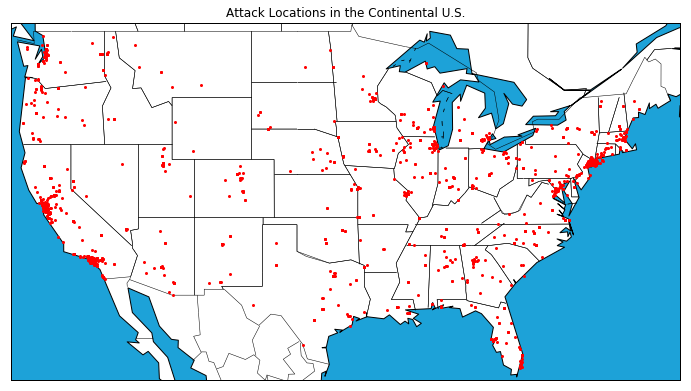

In [43]:
# generated using help from the following tutorial:
# http://www.datadependence.com/2016/06/creating-map-visualisations-in-python/
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 
westlimit=-125.33
southlimit=24.69
eastlimit=-66.09
northlimit=49.5
fig = plt.figure(figsize=(12,12))
m = Basemap(resolution='c', projection='merc', lat_0=(northlimit-southlimit)/2, lon_0=(westlimit-eastlimit)/2,
           llcrnrlon=westlimit, llcrnrlat=southlimit, urcrnrlon=eastlimit, urcrnrlat=northlimit)
m.drawcoastlines()
m.fillcontinents(color='#FFFFFF', lake_color='#1DA2D8')
m.drawstates()
m.drawcountries()
m.drawmapboundary(fill_color='#1DA2D8')
x, y = m(df.longitude.tolist(), df.latitude.tolist())
m.plot(x, y, 'o', markersize=2, color='#FF0000', alpha=1)
plt.title('Attack Locations in the Continental U.S.')
plt.show()

In [44]:
# create a new dataframe, grouping by attack type
df_attck_type = df.groupby(by=['attacktype1'])
# fill missing values with median
df_imputed = df_attck_type.transform(lambda grp: grp.fillna(grp.median()))
# replace deleted columns
col_deleted = list(set(df.columns) - set(df_imputed.columns))
df_imputed[col_deleted] = df[col_deleted]
df_imputed.describe()

,eventid,iyear,imonth,iday,extended,latitude,longitude,specificity,vicinity,crit1,...,ransomamt,ransomamtus,ransompaid,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,attacktype1
count,2.758000e+03,2758.000000,2758.000000,2758.000000,2758.000000,2758.000000,2758.000000,2758.000000,2758.000000,2758.000000,...,1.650000e+02,20.0,17.0,1723.000000,345.000000,2758.000000,2758.000000,2758.000000,2758.000000,2758.000000
mean,1.983206e+11,1983.142132,6.235678,15.468455,0.004714,36.686474,-91.839759,1.020667,0.015591,0.988397,...,1.373939e+05,20000.0,0.0,4.453569,7.410145,0.120015,0.387056,0.105149,0.489666,4.232052
std,1.335005e+09,13.347349,3.396045,9.009974,0.068506,7.374595,21.863835,0.245246,0.123909,0.107108,...,4.331407e+05,0.0,0.0,1.133198,5.651768,0.325037,0.486886,0.306800,0.499712,2.108886
min,1.970010e+11,1970.000000,1.000000,1.000000,0.000000,17.966072,-157.858333,1.000000,0.000000,0.000000,...,0.000000e+00,20000.0,0.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.971101e+11,1971.000000,3.000000,7.000000,0.000000,34.053490,-117.867834,1.000000,0.000000,1.000000,...,5.000000e+04,20000.0,0.0,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.978100e+11,1978.000000,6.000000,15.000000,0.000000,38.890370,-84.511981,1.000000,0.000000,1.000000,...,5.000000e+04,20000.0,0.0,5.000000,8.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,1.992082e+11,1992.000000,9.000000,23.000000,0.000000,40.783060,-74.005941,1.000000,0.000000,1.000000,...,5.000000e+04,20000.0,0.0,5.000000,8.000000,0.000000,1.000000,0.000000,1.000000,7.000000
max,2.016122e+11,2016.000000,12.000000,31.000000,1.000000,64.837778,105.270546,5.000000,1.000000,1.000000,...,5.000000e+06,20000.0,0.0,7.000000,92.000000,1.000000,1.000000,1.000000,1.000000,9.000000


In [51]:
df_attck_type = df_imputed[['attacktype1', 'nkill', 'nkillus', 'nkillter',
                            'nwound', 'nwoundus', 'nwoundte', 'property',
                            'propextent']].groupby(by=['attacktype1', 'nkill'])
# df_attck_type.groupby(by=['attacktype1'])
df_attck_type.describe()

nkillter                                                 \
                      count      mean       std  min   25%  50%   75%  max   
attacktype1 nkill                                                            
1           0.0        60.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0   
            1.0        58.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0   
            2.0         9.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0   
            4.0         1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0   
2           0.0       131.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0   
            1.0        81.0  0.111111  0.316228  0.0  0.00  0.0  0.00  1.0   
            2.0        24.0  0.166667  0.481543  0.0  0.00  0.0  0.00  2.0   
            3.0         3.0  0.666667  0.577350  0.0  0.50  1.0  1.00  1.0   
            4.0         1.0  1.000000       NaN  1.0  1.00  1.0  1.00  1.0   
            5.0         2.0  1.000000  1.414214  0.0  0.50  1.0  1.50  2.0   
            6.0         2.0  1.000000  0.000000  1.0  1.00  1.0  1.00  1.0   
            7.0         2.0  0.500000  0.707107  0.0  0.25  0.5  0.75  1.0   
            8.0         1.0  1.000000       NaN  1.0  1.00  1.0  1.00  1.0   
            9.0         1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0   
            13.0        1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0   
3           0.0      1341.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0   
            1.0        27.0  0.111111  0.320256  0.0  0.00  0.0  0.00  1.0   
            2.0         4.0  0.500000  1.000000  0.0  0.00  0.0  0.50  2.0   
            3.0         2.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0   
            4.0         1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0   
            11.0        1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0   
            16.0        1.0  2.000000       NaN  2.0  2.00  2.0  2.00  2.0   
            168.0       1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0   
4           0.0        10.0  0.600000  0.516398  0.0  0.00  1.0  1.00  1.0   
            1.0         2.0  0.500000  0.707107  0.0  0.25  0.5  0.75  1.0   
            2.0         1.0  1.000000       NaN  1.0  1.00  1.0  1.00  1.0   
            44.0        1.0  4.000000       NaN  4.0  4.00  4.0  4.00  4.0   
            189.0       1.0  5.000000       NaN  5.0  5.00  5.0  5.00  5.0   
            1382.0      1.0  5.000000       NaN  5.0  5.00  5.0  5.00  5.0   
            1383.0      1.0  5.000000       NaN  5.0  5.00  5.0  5.00  5.0   
5           0.0        50.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0   
            1.0         6.0  0.333333  0.516398  0.0  0.00  0.0  0.75  1.0   
            2.0         1.0  2.000000       NaN  2.0  2.00  2.0  2.00  2.0   
            3.0         1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0   
            50.0        1.0  1.000000       NaN  1.0  1.00  1.0  1.00  1.0   
6           0.0        15.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0   
            1.0         3.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0   
            4.0         1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0   
            15.0        1.0  2.000000       NaN  2.0  2.00  2.0  2.00  2.0   
7           0.0       828.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0   
            1.0         6.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0   
            2.0         3.0  1.666667  0.577350  1.0  1.50  2.0  2.00  2.0   
            15.0        1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0   
8           0.0        53.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0   
            1.0         3.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0   
            2.0         2.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0   
9           0.0         9.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0   
            1.0         2.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0   

                   nkillus              

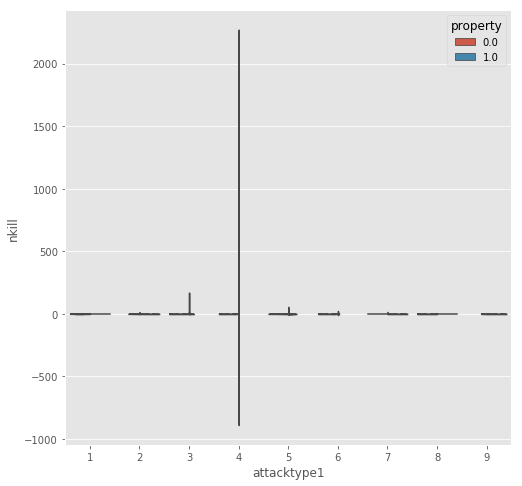

In [54]:
import seaborn as sns
f, ax = plt.subplots(figsize=(8, 8))
sns.violinplot(x='attacktype1', y='nkill', hue='property', data=df_imputed,
               split=True, inner='quart')

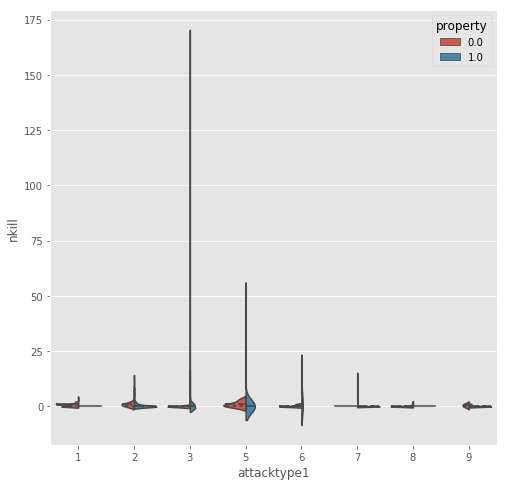

In [57]:
# rerun again without hijackings
f, ax = plt.subplots(figsize=(8, 8))
df_imputed = df_imputed[df_imputed['attacktype1'] != 4]
sns.violinplot(x='attacktype1', y='nkill', hue='property', data=df_imputed,
               split=True, inner='quart')